In [82]:
data_text = """
"City","Temperature","Latitude"
"Sapporo",15,43.1
"Aomori",16,40.1
"Sendai",20,38.3
"Niigata",17,37.9
"Kanazawa",18,36.6
"Tokyo",24,35.7
"Osaka",22,34.7
"Fukuoka",22,33.6
"Kochi",24,33.6
"Kagoshima",23,31.6
"Naha",26,26.2
"""

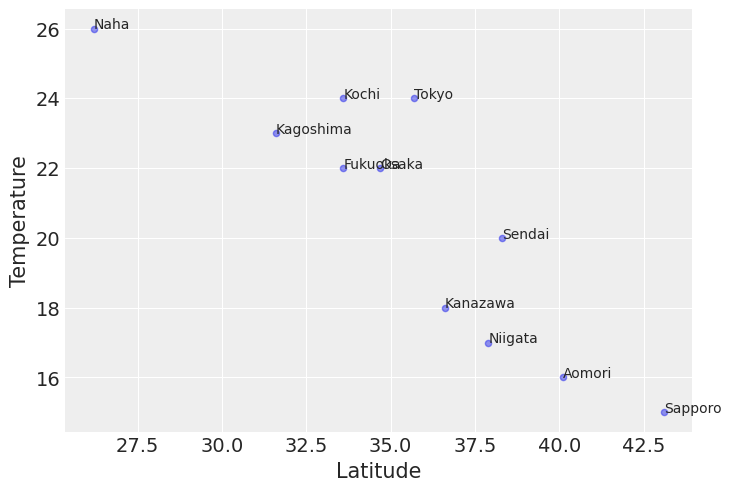

In [83]:
import io

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(io.StringIO(data_text), index_col=0)
fig = df.plot.scatter(x="Latitude", y="Temperature", alpha=0.5)
for index, row in df.iterrows():
    fig.annotate(index, xy=(row["Latitude"],row["Temperature"]), size=10)

$y_i \text{\textasciitilde} \mathcal{N} (b_0 + b_1 \cdot x_i, \sigma^2) $

In [84]:
import csv
import io

import matplotlib.pyplot as plt
import numpy as np
import pystan

raw_data = []
with io.StringIO(data_text) as f:
    reader = csv.reader(f)
    for row in reader:
        if row:
            if row[0] != "City":
                row = [row[0], float(row[1]), float(row[2])]
            raw_data.append(row)
# The 1st element is header.
header = raw_data.pop(0)

id_ = []
y = []
x = []
n_data = len(raw_data)

for line_data in raw_data:
    id_.append(line_data[0])
    y.append(line_data[1])
    x.append(line_data[2])

data = {"N": n_data, "Y": y, "X": x}

for value in zip(id_, y, x):
    print(value)


('Sapporo', 15.0, 43.1)
('Aomori', 16.0, 40.1)
('Sendai', 20.0, 38.3)
('Niigata', 17.0, 37.9)
('Kanazawa', 18.0, 36.6)
('Tokyo', 24.0, 35.7)
('Osaka', 22.0, 34.7)
('Fukuoka', 22.0, 33.6)
('Kochi', 24.0, 33.6)
('Kagoshima', 23.0, 31.6)
('Naha', 26.0, 26.2)


In [85]:
script = """
data {
    int N;
    real Y[N];
    real X[N];
}
parameters {
    real b0;
    real b1;
    real<lower=0> sgm;
}
transformed parameters {
    real mu[N];
    for (i in 1:N)
        mu[i] = b0 + b1 * X[i];
}
model {
    for (i in 1:N)
        Y[i] ~ normal(mu[i], sgm);
}
"""
sm = pystan.StanModel(model_code=script)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b11483612236f6f45455fc319fa8fb44 NOW.
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++
In file included from /home/K5/miniconda3/envs/stan/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969,
                 from /home/K5/miniconda3/envs/stan/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/K5/miniconda3/envs/stan/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/pystan_iwu9br1f/stanfit4anon_model_b11483612236f6f45455fc319fa8fb44_6681527317667940665.cpp:709:
/home/K5/miniconda3/envs/stan/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      | 

In [112]:
n_chains = 4
fit = sm.sampling(data=data, chains=n_chains, n_jobs=1)
print(fit)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%]  (Warmup)
Iteration:  600 / 2000 [ 30%]  (Warmup)
Iteration:  800 / 2000 [ 40%]  (Warmup)
Iteration: 1000 / 2000 [ 50%]  (Warmup)
Iteration: 1001 / 2000 [ 50%]  (Sampling)
Iteration: 1200 / 2000 [ 60%]  (Sampling)
Iteration: 1400 / 2000 [ 70%]  (Sampling)
Iteration: 1600 / 2000 [ 80%]  (Sampling)
Iteration: 1800 / 2000 [ 90%]  (Sampling)
Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 0.21 seconds (Warm-up)
               0.2 seconds (Sampling)
               0.41 seconds (Total)


Gradient evaluation took 0 seconds
1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iterat

array([[<AxesSubplot:title={'center':'b0'}>,
        <AxesSubplot:title={'center':'b0'}>],
       [<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b1'}>],
       [<AxesSubplot:title={'center':'sgm'}>,
        <AxesSubplot:title={'center':'sgm'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

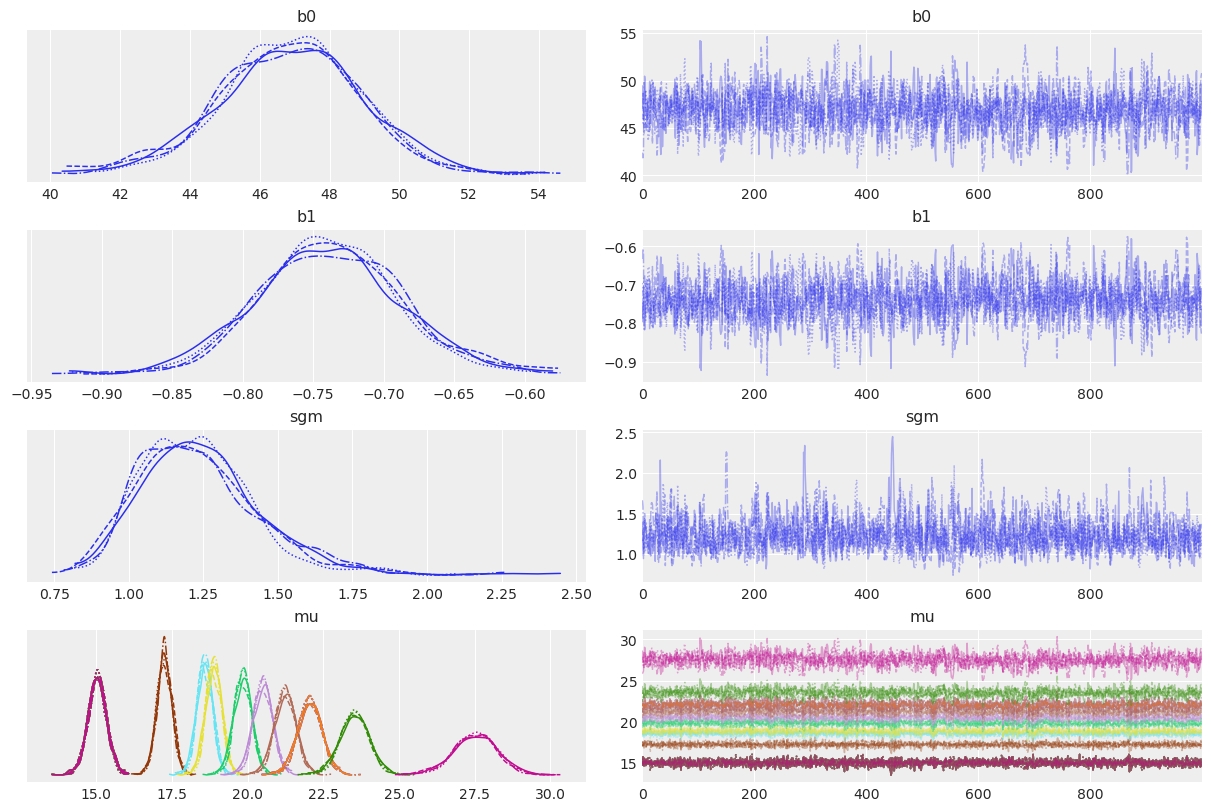

In [ ]:
import arviz
arviz.plot_trace(fit)

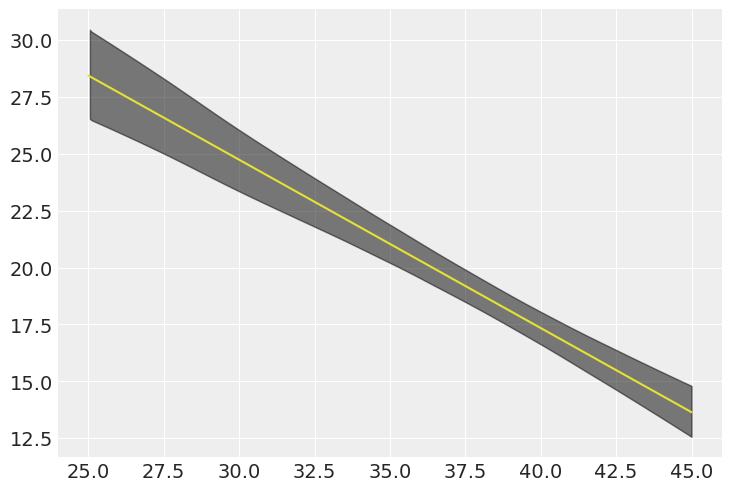

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import arviz as az

n_chain = 4

az.style.use("arviz-darkgrid")
x_graph = np.linspace(25, 45, 21)

df = fit.to_dataframe()
y_chains = []
for i_chain in range(n_chain):
    df_chain = df[df["chain"]==i_chain]
    # y_est = df_chain["b0"].values + df_chain["b1"].values * x_graph[0]
    y_est = df_chain["b0"].values.reshape(-1, 1) + df_chain["b1"].values.reshape(-1, 1) * x_graph.reshape(-1, 1).T
    y_chains.append(y_est)
y_graph = np.stack(y_chains, axis=0)

# Merge chain again to calculate mean
y_list = [y_array.reshape(y_graph.shape[1], y_graph.shape[2]) for y_array in np.split(y_graph, y_graph.shape[0], axis=0)]
y_all = np.concatenate(y_list, axis=0)
y_graph_rep = np.mean(y_all, axis=0)

az.plot_hdi(x_graph, y_graph, color="k", plot_kwargs={"ls": "--"})
plt.plot(x_graph, y_graph_rep, "C6")

